# Regresión.

In [1]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy
import sklearn.metrics # importar libreria sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_absolute_error, f1_score
# Definamos el `random_state`:
random_state = 42


In [2]:
#Cargo el archivo
file_runrates ='https://raw.githubusercontent.com/jzuluagams/Eafit_AI/main/Dataset_Runrates2.xlsx' # Cargar archivo fuente, updated URL to raw content
runrates = pd.read_excel(file_runrates) # Lectura de archivo y cargarlo a la variable runrates
print(runrates.columns)
runrates.head()


Index(['Country', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Jun,1
1,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Jul,33
2,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Aug,3243
3,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Sep,2057
4,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Oct,2032


In [3]:
# Calculando mediana, minimo, maximo
mean_sales = runrates['Sales'].mean()
min_sales = runrates['Sales'].min()
max_sales = runrates['Sales'].max()
print(mean_sales)
print(min_sales)
print(max_sales)

373.5836538827741
-58865
2453779


In [4]:
# Veamos la descripción del dataset:
runrates.describe(include='all')



,Country,Service Line,Product Line,Business ID,Year,Month,Sales
count,26257,26257,26257,26257,26257.000000,26257,2.625700e+04
unique,1,4,7,20,NaN,45,NaN
top,3-076 - Brazil,Digital Workplace,DWP - Digital Workplace Essentials,TS001A2 - 365-Simple,NaN,2024 - Aug,NaN
freq,26257,12473,12407,6397,NaN,1246,NaN
mean,NaN,NaN,NaN,NaN,2022.888525,NaN,3.735837e+02
std,NaN,NaN,NaN,NaN,1.027107,NaN,1.529727e+04
min,NaN,NaN,NaN,NaN,2021.000000,NaN,-5.886500e+04
25%,NaN,NaN,NaN,NaN,2022.000000,NaN,4.000000e+00
50%,NaN,NaN,NaN,NaN,2023.000000,NaN,2.400000e+01
75%,NaN,NaN,NaN,NaN,2024.000000,NaN,1.270000e+02


In [5]:
# Limpieza de datos

runrates['Country_Code'] = runrates['Country'].str[:5]  # Extraer 5 caracteres correspondientes al codigo del Pais
runrates['Country_Name'] = runrates['Country'].str[8:]  # Dejar desde el caracter 8 en adelante el nombre del pais

print(runrates[['Country_Code', 'Country_Name']].head())
runrates.head()

# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country', axis=1)

# Reordenar Columnas, 'Country_Code' y 'Country_Name' como Columnas iniciales
new_column_order = ['Country_Code', 'Country_Name'] + [col for col in runrates.columns if col not in ['Country_Code', 'Country_Name']]
runrates = runrates[new_column_order]

print(runrates.columns)



  Country_Code Country_Name
0        3-076       Brazil
1        3-076       Brazil
2        3-076       Brazil
3        3-076       Brazil
4        3-076       Brazil
Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


In [6]:
# Modificar Columna Month

runrates['Extract_Year'] = runrates['Month'].str[:6]  # Extraer 6 caracteres correspondientes al codigo del Pais
runrates['Month'] = runrates['Month'].str[7:]  # Dejar desde el caracter 7 en adelante el nombre del mes

print(runrates[['Extract_Year', 'Month']].head())

# Eliminar Columna Extract_year
runrates = runrates.drop('Extract_Year', axis=1)
print(runrates.columns)
runrates.head()

# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country_Code', axis=1)

  Extract_Year Month
0       2022 -   Jun
1       2022 -   Jul
2       2022 -   Aug
3       2022 -   Sep
4       2022 -   Oct
Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


In [7]:
# Definir variables en el DataFrame
runrates['Business ID'] = runrates['Business ID'].astype(str)
runrates['Month'] = runrates['Month'].astype(str)
runrates['Service Line'] = runrates['Service Line'].astype(str)
runrates['Product Line'] = runrates['Product Line'].astype(str)

# Check if the conversion was successful
print(runrates['Business ID'].dtype)

object


In [8]:
# Agrupando Sales de acuerdo a las categorias
runrates_agrupados = runrates.groupby(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year', 'Month'])['Sales'].sum().reset_index()
runrates = runrates_agrupados
print(runrates.columns)
runrates.head()

Index(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Aug,131
1,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Sep,69
2,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Apr,44527
3,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Aug,12241
4,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Dec,63235


In [9]:
#Remover outliers en Sales

import pandas as pd

# Factor para ajustar el rango de outliers
factor = 1.5  # Puedes ajustar este valor

# Calcular IQR para 'Sales'
Q1 = runrates['Sales'].quantile(0.25)
Q3 = runrates['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior = Q1 - factor * IQR
limite_superior = Q3 + factor * IQR

# Filtrar outliers
runrates_sin_outliers = runrates[(runrates['Sales'] >= limite_inferior) & (runrates['Sales'] <= limite_superior)]
runrates = runrates_sin_outliers
print(runrates.columns)
runrates.head()

Index(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Aug,131
1,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Sep,69
2,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Apr,44527
3,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Aug,12241
5,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Feb,35313


In [10]:
# Exportando a Excel La informacion normalizada
runrates_agrupados.to_excel('runrates_agrupados.xlsx', index=False)
runrates_sin_outliers.to_excel('runrates_sin_outliers.xlsx', index=False)

In [11]:
# Inicio de la codificacion del modelo luego de tener los datos preparados

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score

# Normalizar variables numéricas
numerical_features = ['Year']  # Year es la unica varable numerica en X
scaler = StandardScaler()
X_num = scaler.fit_transform(runrates[numerical_features])

# Codificar variables categóricas
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(runrates[categorical_features])

# Convertir a DataFrame y concatenar las variables normalizadas
X_num_df = pd.DataFrame(X_num, columns=numerical_features)
X_cat_df = pd.DataFrame(X_cat.toarray(), columns=encoder.get_feature_names_out(categorical_features))
X = pd.concat([X_num_df, X_cat_df], axis=1) # Defino set de datos para X
y = runrates['Sales'] # defino la variable target numerica que es Sales

#X_num_df
#X_cat_df
X  # Presenta el set de datos concatenado X_num + X_Cat codificados con OnehotEncoder

,Year,Country_Name_Brazil,Service Line_Cloud Services AWS,Service Line_Cloud Services Azure,Service Line_Digital Workplace,Service Line_Software Sourcing & Portfolio Management,Product Line_AWS - Consumption & Support Services,Product Line_AWS - FinOps,Product Line_Azure - Consumption & Support Services,Product Line_DWP - BackUp Simple,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0.428204,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.428204,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.503348,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.503348,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.503348,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,-0.537572,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
517,-0.537572,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
518,0.428204,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519,0.428204,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Separemos los datos en conjuntos de entrenamiento y prueba:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [13]:
# Crear y entrenar el modelo MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', learning_rate_init=0.1)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate_init=0.1)

In [14]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8502133853659093


MSE: 29033444.464968152
RMSE: 5388.269152981145
MAE: 3776.923566878981
R-squared: 0.845684268603387
R-squared score (training): 0.758
R-squared score (test): 0.846



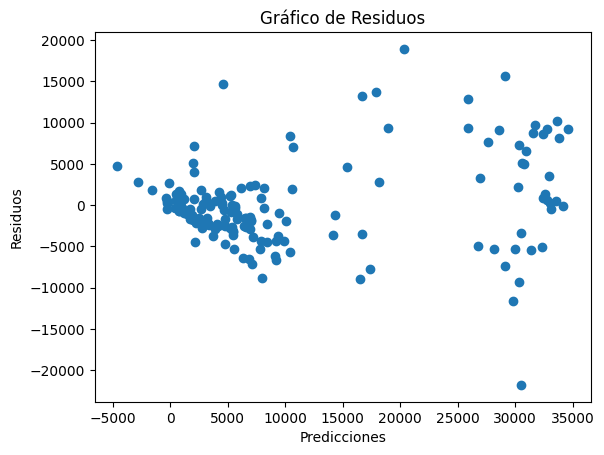

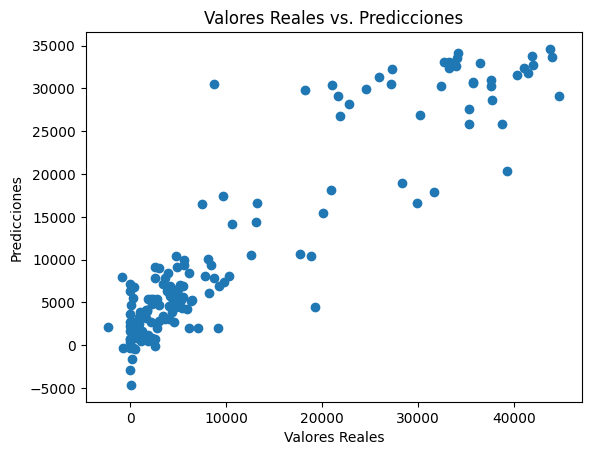

In [15]:
#Ejecutando Modelo de regresion Lineal

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Asumiendo que 'runrates' es tu DataFrame
X = runrates.drop('Sales', axis=1)
y = runrates['Sales']

# Convertir variables categóricas a numéricas usando one-hot encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
#mse = mean_squared_error(y_test, y_pred)
#print("Error cuadrático medio (MSE):", mse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba - uncomment this line
y_pred = model.predict(X_test)

# Métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(model.score(X_test, y_test)))

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()

In [16]:
#Modelo KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

# Codificar variables categóricas
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Change sparse_output to False
X_encoded = encoder.fit_transform(runrates[categorical_features])

# Convertir a DataFrame y concatenar con variables numéricas
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
# Align indices before concatenation
X = pd.concat([runrates.drop(categorical_features + ['Sales'], axis=1).reset_index(drop=True),
                X_encoded_df.reset_index(drop=True)], axis=1)
y = runrates['Sales'].reset_index(drop=True) # Reset index for y as well

# Separar datos ANTES de normalizar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Normalizar variables numéricas en los conjuntos de entrenamiento y prueba por separado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Scale only the training set
X_test = scaler.transform(X_test) # Use the same scaler to transform the test set

# Crear y entrenar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos (n_neighbors)
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el modelo (puedes usar métricas como MSE, RMSE, MAE, R-squared)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 31493393.32990476
RMSE: 5611.8974803451965
MAE: 3760.1466666666665
R-squared: 0.8384985837412404


In [17]:
#Usando Arboles de decisión

#Preparacion de los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Codificar variables categóricas
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(runrates.drop('Sales', axis=1), runrates['Sales'], test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder only on the training data to avoid data leakage
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convertir a DataFrame y concatenar con variables numéricas
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))

#Concatenate the encoded features with the numerical features
# Corrected lines to concatenate the correct DataFrames
X_train = pd.concat([X_train.drop(categorical_features, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

#Creacion y entrenamiento del modelo de arboles de decision.
from sklearn.tree import DecisionTreeRegressor

# Crear instancia del modelo
model = DecisionTreeRegressor(max_depth=5)  # Ajusta max_depth según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

#Evaluacion de la predicción

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 46791940.36068936
RMSE: 6840.463460957112
MAE: 4607.539898391737
R-squared: 0.7788482497056792


Comparación de la prueba de prediccion con los diferentes modelos de prediccion:

1. Regresion Lineal
2. KNN
3. Arboles de Decision

obteniendo los siguientes resultados de R2

1. Redes Neuronales MLProgressor: 0.8531873405437487
2. Regresion Lineal: 0.845684268603387
3. KNN: 0.8384985837412404
4. Arboles de Decision: 0.7788482497056792

Conclusion:
Para el set de datos definido, el modelo con mejor probabilidad de predicción seria el de MLPRogressor y en segunda instancia el modelo de Regresión Lineal.

Grupo 1.